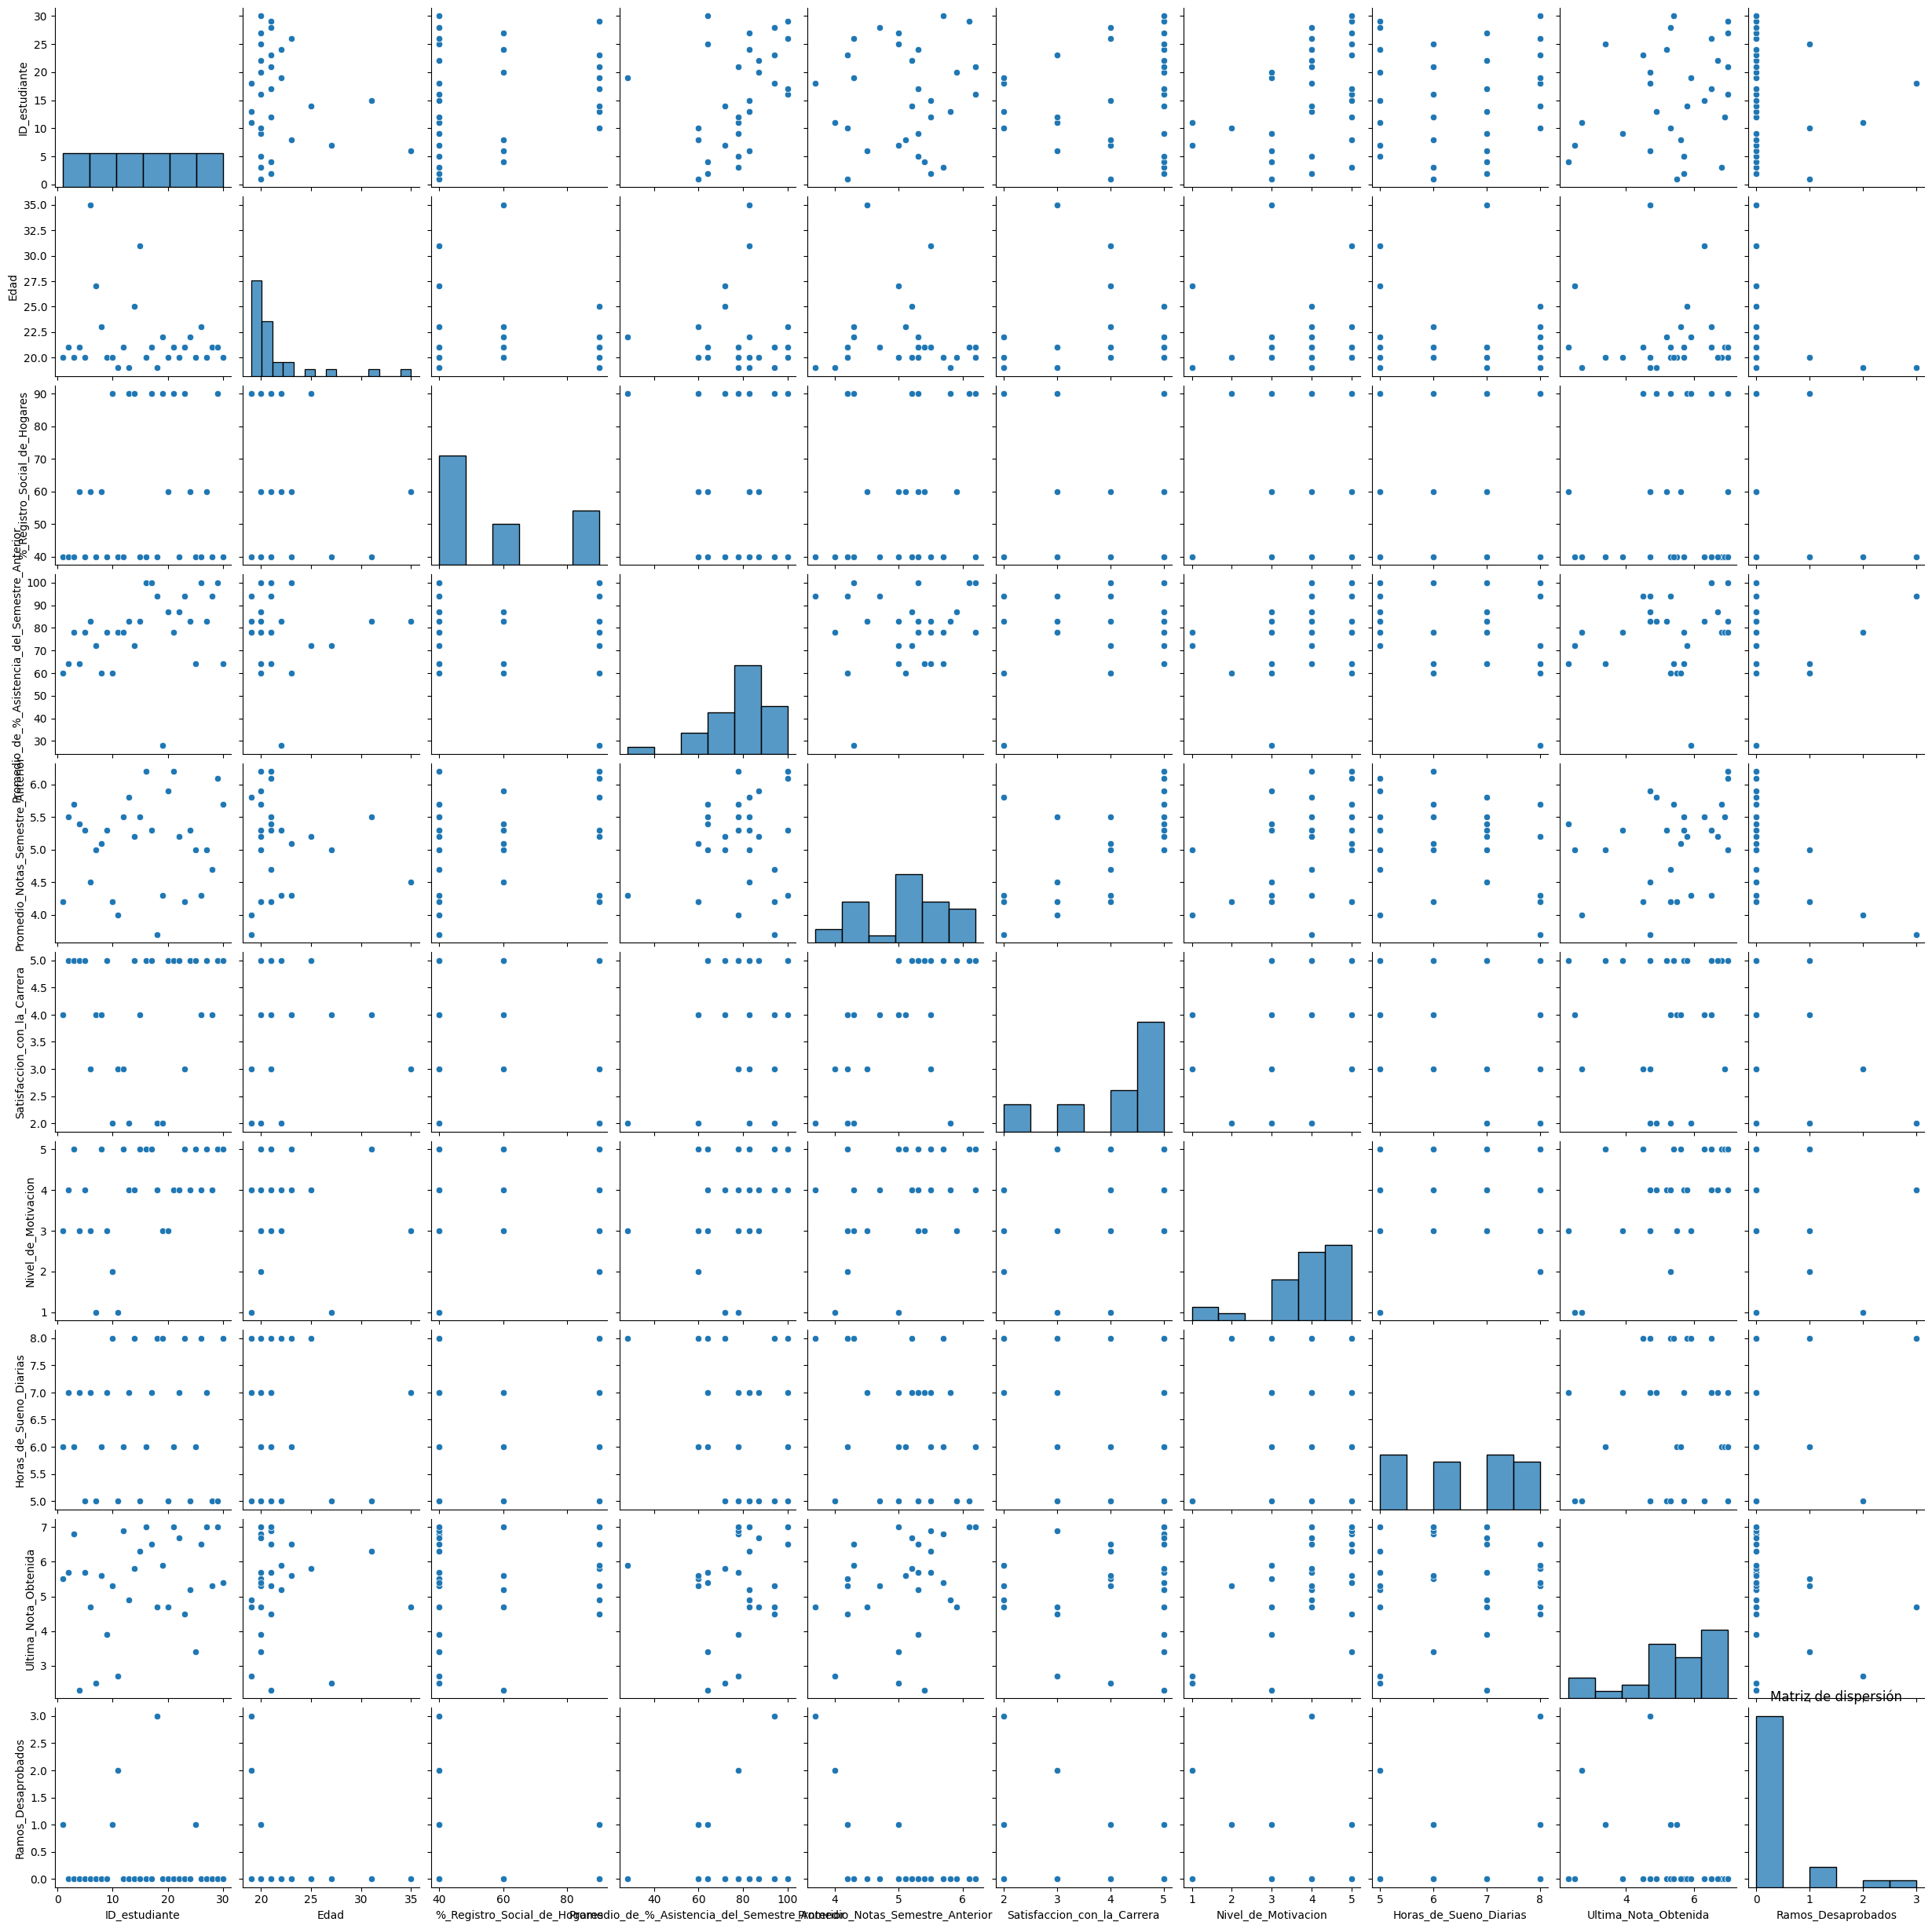

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los datos
df = pd.read_csv('Datos_de_Estudiantes.csv')

# Análisis exploratorio de datos
df.head()
df.describe()
sns.pairplot(df)
plt.title('Matriz de dispersión')
plt.show()

In [11]:
df.describe()

,ID_estudiante,Edad,%_Registro_Social_de_Hogares,Promedio_de_%_Asistencia_del_Semestre_Anterior,Promedio_Notas_Semestre_Anterior,Satisfaccion_con_la_Carrera,Nivel_de_Motivacion,Horas_de_Sueno_Diarias,Ultima_Nota_Obtenida,Ramos_Desaprobados
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,21.766667,57.333333,78.233333,5.110000,4.133333,3.900000,6.466667,5.380000,0.266667
std,8.803408,3.539758,21.485092,15.884678,0.680948,1.105888,1.155198,1.136642,1.366445,0.691492
min,1.000000,19.000000,40.000000,28.000000,3.700000,2.000000,1.000000,5.000000,2.300000,0.000000
25%,8.250000,20.000000,40.000000,66.000000,4.550000,3.250000,3.000000,5.250000,4.700000,0.000000
50%,15.500000,21.000000,40.000000,78.000000,5.250000,5.000000,4.000000,6.500000,5.550000,0.000000
75%,22.750000,21.750000,82.500000,87.000000,5.500000,5.000000,5.000000,7.000000,6.500000,0.000000
max,30.000000,35.000000,90.000000,100.000000,6.200000,5.000000,5.000000,8.000000,7.000000,3.000000


In [12]:
# Guardar la variable dependiente antes de eliminarla
y = df['Promedio_Notas_Semestre_Anterior']

# Eliminar columnas no relevantes
df = df.drop(columns=['ID_estudiante', 'Promedio_Notas_Semestre_Anterior', 'Ultima_Nota_Obtenida'])

# Transformar variables categóricas a numéricas
df['Genero'] = df['Genero'].map({'Masculino': 1, 'Femenino': 0})
df['Estudia_con_Gratuidad'] = df['Estudia_con_Gratuidad'].map({'Si': 1, 'No': 0})
df['Problemas_Personales'] = df['Problemas_Personales'].map({'Si': 1, 'No': 0})
df['Problemas_Familiares'] = df['Problemas_Familiares'].map({'Si': 1, 'No': 0})
df['Participa_en_Clases'] = df['Participa_en_Clases'].map({'Si': 1, 'No': 0})
df['Trabaja'] = df['Trabaja'].map({'Si': 1, 'No': 0})

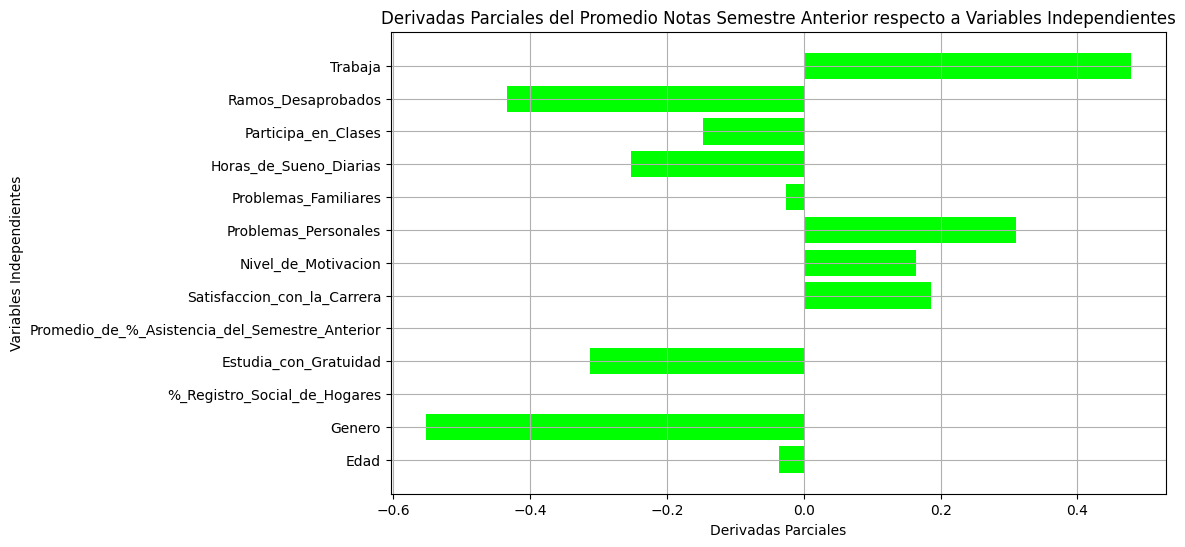

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Separar variables dependientes e independientes
X = df  # 'Promedio_Notas_Semestre_Anterior' ya se ha guardado en y

# Ajustar el modelo
LM = LinearRegression()
LM.fit(X, y)

# Calcular las derivadas parciales
coeficientes = LM.coef_

def derivada_parcial(coeficientes, x):
    derivadas_parciales = []
    for i, coef in enumerate(coeficientes):
        derivadas_parciales.append(coef)
    return derivadas_parciales

x_ejemplo = X.iloc[0].to_numpy()
derivadas_parciales_ejemplo = derivada_parcial(coeficientes, x_ejemplo)

# Graficar las derivadas parciales
columns = X.columns
plt.figure(figsize=(10, 6))
plt.barh(columns, coeficientes, color='lime')
plt.xlabel('Derivadas Parciales')
plt.ylabel('Variables Independientes')
plt.title('Derivadas Parciales del Promedio Notas Semestre Anterior respecto a Variables Independientes')
plt.grid(True)
plt.show()


In [14]:
# Mostrar los coeficientes del modelo y sus respectivas variables independientes
for col, coef in zip(X.columns, coeficientes):
    print(f'Variable: {col}, Coeficiente: {coef:.4f}')

Variable: Edad, Coeficiente: -0.0358
Variable: Genero, Coeficiente: -0.5518
Variable: %_Registro_Social_de_Hogares, Coeficiente: -0.0003
Variable: Estudia_con_Gratuidad, Coeficiente: -0.3129
Variable: Promedio_de_%_Asistencia_del_Semestre_Anterior, Coeficiente: 0.0005
Variable: Satisfaccion_con_la_Carrera, Coeficiente: 0.1860
Variable: Nivel_de_Motivacion, Coeficiente: 0.1647
Variable: Problemas_Personales, Coeficiente: 0.3100
Variable: Problemas_Familiares, Coeficiente: -0.0264
Variable: Horas_de_Sueno_Diarias, Coeficiente: -0.2525
Variable: Participa_en_Clases, Coeficiente: -0.1470
Variable: Ramos_Desaprobados, Coeficiente: -0.4332
Variable: Trabaja, Coeficiente: 0.4777


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred = LM.predict(X)

# Calcular métricas de evaluación
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse:.4f}')
print(f'Coeficiente de Determinación (R^2): {r2:.4f}')

Error Cuadrático Medio (MSE): 0.1008
Coeficiente de Determinación (R^2): 0.7752


In [16]:
# Ajustar el modelo
LM = LinearRegression()
LM.fit(X, y)

# Predicciones sobre los datos de prueba
y_pred = LM.predict(X)

# Coeficientes del modelo (derivadas parciales)
coefficients = pd.DataFrame(LM.coef_, X.columns, columns=['Partial Derivative'])
print("Coeficientes del modelo (derivadas parciales):")
print(coefficients)

Coeficientes del modelo (derivadas parciales):
                                                Partial Derivative
Edad                                                     -0.035780
Genero                                                   -0.551775
%_Registro_Social_de_Hogares                             -0.000313
Estudia_con_Gratuidad                                    -0.312893
Promedio_de_%_Asistencia_del_Semestre_Anterior            0.000502
Satisfaccion_con_la_Carrera                               0.186021
Nivel_de_Motivacion                                       0.164730
Problemas_Personales                                      0.309992
Problemas_Familiares                                     -0.026438
Horas_de_Sueno_Diarias                                   -0.252545
Participa_en_Clases                                      -0.147047
Ramos_Desaprobados                                       -0.433187
Trabaja                                                   0.477715


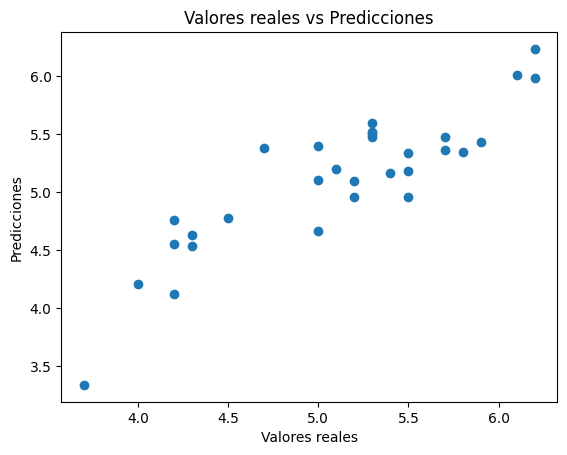

In [17]:
# Visualización de resultados
plt.scatter(y, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs Predicciones")
plt.show()

In [18]:
# Función para predecir el rendimiento académico
def predict_performance(student_data):
    student_df = pd.DataFrame(student_data, index=[0])
    student_df['Genero'] = student_df['Genero'].map({'Masculino': 0, 'Femenino': 1})
    student_df['Estudia_con_Gratuidad'] = student_df['Estudia_con_Gratuidad'].map({'No': 0, 'Si': 1})
    student_df['Problemas_Personales'] = student_df['Problemas_Personales'].map({'No': 0, 'Si': 1})
    student_df['Problemas_Familiares'] = student_df['Problemas_Familiares'].map({'No': 0, 'Si': 1})
    student_df['Participa_en_Clases'] = student_df['Participa_en_Clases'].map({'No': 0, 'Si': 1})
    student_df['Trabaja'] = student_df['Trabaja'].map({'No': 0, 'Si': 1})
    prediction = LM.predict(student_df)
    return prediction

# Ejemplo de predicción
nuevo_estudiante = {
    "Edad": 21,
    "Genero": "Femenino",
    "%_Registro_Social_de_Hogares": 50,
    "Estudia_con_Gratuidad": "Si",
    "Promedio_de_%_Asistencia_del_Semestre_Anterior": 80,
    "Satisfaccion_con_la_Carrera": 4,
    "Nivel_de_Motivacion": 4,
    "Problemas_Personales": "No",
    "Problemas_Familiares": "No",
    "Horas_de_Sueno_Diarias": 7,
    "Participa_en_Clases": "Si",
    "Ramos_Desaprobados": 0,
    "Trabaja": "No"
}

print(f"Predicción a partir de los promedios del semestre anterior: {predict_performance(nuevo_estudiante)[0]}")

Predicción a partir de los promedios del semestre anterior: 4.721567535493934
